In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import timedelta, date

from nltk.tokenize import sent_tokenize, word_tokenize
import nltk as nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('arp.csv')

tickers = df['stock'].unique()

In [4]:
tickers

array(['A', 'AAMC', 'AAME', ..., 'ZU', 'ZUMZ', 'ZX'], dtype=object)

In [5]:
tickers[tickers == 'AAPL']

array(['AAPL'], dtype=object)

In [7]:
AAPL_Set = df[df['stock'] == 'AAPL'] 

In [8]:
AAPL_Set

,Unnamed: 0,title,date,stock
3668,7120.0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10 11:33:00-04:00,AAPL
3669,7121.0,10 Biggest Price Target Changes For Wednesday,2020-06-10 08:14:00-04:00,AAPL
3670,7122.0,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10 07:53:00-04:00,AAPL
3671,7123.0,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10 07:19:00-04:00,AAPL
3672,7124.0,Apple To Let Users Trade In Their Mac Computer...,2020-06-10 06:27:00-04:00,AAPL
...,...,...,...,...
4132,7585.0,"UBS Maintains Buy on Apple, Lowers Price Targe...",2020-03-10 07:06:00-04:00,AAPL
4133,7586.0,123 Biggest Movers From Yesterday,2020-03-10 05:57:00-04:00,AAPL
4134,7587.0,Crude Awakening: Energy Sector Takes A 20% Spi...,2020-03-09 17:09:00-04:00,AAPL
4135,7588.0,Investor Movement Index Summary: February 2020,2020-03-09 13:57:00-04:00,AAPL


In [10]:
AAPL_Set['date'].iloc[0]

'2020-06-10 11:33:00-04:00'

In [12]:
AAPL_Set['date'].iloc[0][0:10]

'2020-06-10'

In [14]:
date_array = []
for i in range(len(AAPL_Set)):
    date_array.append(AAPL_Set['date'].iloc[i][0:10])
    
AAPL_Set['NDs'] = date_array

/var/folders/tz/3x_g51194994n65vh8q7y4kh0000gn/T/ipykernel_42440/1732997840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_Set['NDs'] = date_array


In [15]:
AAPL_Set

,Unnamed: 0,title,date,stock,NDs
3668,7120.0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10 11:33:00-04:00,AAPL,2020-06-10
3669,7121.0,10 Biggest Price Target Changes For Wednesday,2020-06-10 08:14:00-04:00,AAPL,2020-06-10
3670,7122.0,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10 07:53:00-04:00,AAPL,2020-06-10
3671,7123.0,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10 07:19:00-04:00,AAPL,2020-06-10
3672,7124.0,Apple To Let Users Trade In Their Mac Computer...,2020-06-10 06:27:00-04:00,AAPL,2020-06-10
...,...,...,...,...,...
4132,7585.0,"UBS Maintains Buy on Apple, Lowers Price Targe...",2020-03-10 07:06:00-04:00,AAPL,2020-03-10
4133,7586.0,123 Biggest Movers From Yesterday,2020-03-10 05:57:00-04:00,AAPL,2020-03-10
4134,7587.0,Crude Awakening: Energy Sector Takes A 20% Spi...,2020-03-09 17:09:00-04:00,AAPL,2020-03-09
4135,7588.0,Investor Movement Index Summary: February 2020,2020-03-09 13:57:00-04:00,AAPL,2020-03-09


In [21]:
p = yf.Ticker('AAPL').history(start = '2020-03-10', end = '2020-03-11')
((p['Close'] - p['Open'])/p['Open']).values[0]

0.029587866262672683

In [32]:
s = tick_Set['NDs'].values[i]
s = date.fromisoformat(s)
d = timedelta(days = 1)
t = s + d
t = t.isoformat()

(datetime.date(2020, 3, 9), '2020-03-10')

In [ ]:
d = timedelta(days = 1)
t = s + d
t

In [45]:
changes = []
for i in range(len(tick_Set)):
    try:
        start = tick_Set['NDs'].values[i]
        s = date.fromisoformat(start)
        delta = timedelta(days = 1)
        t = s + delta
        end = t.isoformat()
        p = yf.Ticker('AAPL').history(start = start, end = end)
        pct_change = ((p['Close'] - p['Open'])/p['Open']).values[0]
        if(pct_change >= 0):
            changes.append('Buy')
        else:
            changes.append('Sell')
    except Exception as e:
        changes.append('Hold')

AAPL: No price data found, symbol may be delisted (1d 2020-06-07 -> 2020-06-08)
AAPL: No price data found, symbol may be delisted (1d 2020-06-06 -> 2020-06-07)
AAPL: No price data found, symbol may be delisted (1d 2020-05-31 -> 2020-06-01)
AAPL: No price data found, symbol may be delisted (1d 2020-05-25 -> 2020-05-26)
AAPL: No price data found, symbol may be delisted (1d 2020-05-17 -> 2020-05-18)
AAPL: No price data found, symbol may be delisted (1d 2020-05-16 -> 2020-05-17)
AAPL: No price data found, symbol may be delisted (1d 2020-05-09 -> 2020-05-10)
AAPL: No price data found, symbol may be delisted (1d 2020-05-02 -> 2020-05-03)
AAPL: No price data found, symbol may be delisted (1d 2020-04-26 -> 2020-04-27)
AAPL: No price data found, symbol may be delisted (1d 2020-04-25 -> 2020-04-26)
AAPL: No price data found, symbol may be delisted (1d 2020-04-19 -> 2020-04-20)
AAPL: No price data found, symbol may be delisted (1d 2020-04-18 -> 2020-04-19)
AAPL: No price data found, symbol may be

In [46]:
tick_Set['Change'] = changes

In [47]:
AAPL_Set

,Unnamed: 0,title,date,stock,NDs,Change
3668,7120.0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10 11:33:00-04:00,AAPL,2020-06-10,Buy
3669,7121.0,10 Biggest Price Target Changes For Wednesday,2020-06-10 08:14:00-04:00,AAPL,2020-06-10,Buy
3670,7122.0,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10 07:53:00-04:00,AAPL,2020-06-10,Buy
3671,7123.0,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10 07:19:00-04:00,AAPL,2020-06-10,Buy
3672,7124.0,Apple To Let Users Trade In Their Mac Computer...,2020-06-10 06:27:00-04:00,AAPL,2020-06-10,Buy
...,...,...,...,...,...,...
4132,7585.0,"UBS Maintains Buy on Apple, Lowers Price Targe...",2020-03-10 07:06:00-04:00,AAPL,2020-03-10,Buy
4133,7586.0,123 Biggest Movers From Yesterday,2020-03-10 05:57:00-04:00,AAPL,2020-03-10,Buy
4134,7587.0,Crude Awakening: Energy Sector Takes A 20% Spi...,2020-03-09 17:09:00-04:00,AAPL,2020-03-09,Buy
4135,7588.0,Investor Movement Index Summary: February 2020,2020-03-09 13:57:00-04:00,AAPL,2020-03-09,Buy


In [49]:
useful_data = AAPL_Set[['title', 'Change']]

In [50]:
useful_data

,title,Change
3668,Tech Stocks And FAANGS Strong Again To Start D...,Buy
3669,10 Biggest Price Target Changes For Wednesday,Buy
3670,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",Buy
3671,"Deutsche Bank Maintains Buy on Apple, Raises P...",Buy
3672,Apple To Let Users Trade In Their Mac Computer...,Buy
...,...,...
4132,"UBS Maintains Buy on Apple, Lowers Price Targe...",Buy
4133,123 Biggest Movers From Yesterday,Buy
4134,Crude Awakening: Energy Sector Takes A 20% Spi...,Buy
4135,Investor Movement Index Summary: February 2020,Buy


In [53]:
words = AAPL_Set['title']
sentiment = AAPL_Set['Change']
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
)
features = vectorizer.fit_transform(words)
features_nd = features.toarray()
X_train, X_test, y_train, y_test  = train_test_split(
        features_nd, 
        sentiment,
        train_size=0.90, 
        random_state=1)

In [54]:
log_model = LogisticRegression(solver = 'liblinear', max_iter = 750,verbose = 1,warm_start = False)
log_model = log_model.fit(X_train,y_train)

[LibLinear]iter  1 act 1.543e+02 pre 1.424e+02 delta 8.277e+00 f 2.925e+02 |g| 8.889e+01 CG   6
iter  2 act 9.185e+00 pre 8.404e+00 delta 8.277e+00 f 1.382e+02 |g| 1.852e+01 CG   6
iter  3 act 4.466e-01 pre 4.242e-01 delta 8.277e+00 f 1.290e+02 |g| 4.076e+00 CG   6
iter  4 act 8.422e-03 pre 8.385e-03 delta 8.277e+00 f 1.285e+02 |g| 4.280e-01 CG   6
iter  5 act 7.797e-05 pre 7.802e-05 delta 8.277e+00 f 1.285e+02 |g| 3.159e-02 CG   8
iter  1 act 1.990e+02 pre 1.772e+02 delta 2.181e+00 f 2.925e+02 |g| 2.560e+02 CG   2
cg reaches trust region boundary
iter  2 act 3.788e+01 pre 3.225e+01 delta 2.862e+00 f 9.346e+01 |g| 5.619e+01 CG   3
iter  3 act 1.340e+01 pre 1.266e+01 delta 2.922e+00 f 5.558e+01 |g| 1.915e+01 CG   4
iter  4 act 9.857e-01 pre 8.903e-01 delta 2.922e+00 f 4.218e+01 |g| 7.441e+00 CG   2
iter  5 act 9.393e-02 pre 9.049e-02 delta 2.922e+00 f 4.120e+01 |g| 1.047e+00 CG   4
iter  6 act 1.732e-03 pre 1.725e-03 delta 2.922e+00 f 4.110e+01 |g| 1.339e-01 CG   5
iter  7 act 5.122e-06

In [55]:
y_pred = log_model.predict(X_test)
print("\n")
print(f'The accuracy of this model on the test set is: {round(100*accuracy_score(y_test, y_pred),2)}%')



The accuracy of this model on the test set is: 72.34%


In [56]:
dates = (AAPL_Set['NDs'].min(), AAPL_Set['NDs'].max())

In [57]:
dates

('2020-03-09', '2020-06-10')

In [59]:
prices = yf.Ticker('AAPL').history(start = dates[0], end = dates[1], period = 'd')

In [60]:
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-09 00:00:00-04:00,64.308820,67.805269,64.125952,64.898880,286744800,0.0,0.0
2020-03-10 00:00:00-04:00,67.573653,69.841222,65.679128,69.573013,285290000,0.0,0.0
2020-03-11 00:00:00-04:00,67.634602,68.568449,66.286243,67.156700,255598800,0.0,0.0
2020-03-12 00:00:00-04:00,62.404542,65.832719,60.468572,60.524651,418474000,0.0,0.0
2020-03-13 00:00:00-04:00,64.586789,68.251478,61.675515,67.776016,370732000,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-03 00:00:00-04:00,79.374485,79.750994,78.797497,79.486946,104491200,0.0,0.0
2020-06-04 00:00:00-04:00,79.308477,79.609188,78.425882,78.802391,87560400,0.0,0.0
2020-06-05 00:00:00-04:00,79.054210,81.107882,79.024873,81.046761,137250400,0.0,0.0


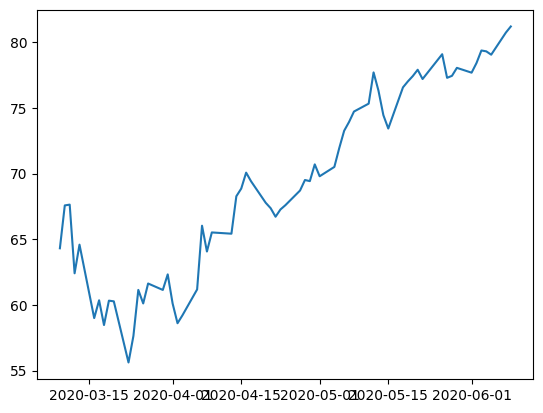

In [61]:
plt.plot(prices['Open'])

In [68]:
y_test.index.values

array([3999, 3865, 3960, 4050, 3735, 3904, 3730, 3963, 3827, 4041, 3955,
       3699, 4101, 3910, 4068, 3961, 3733, 3917, 4023, 4082, 3988, 3859,
       3672, 3787, 3770, 3974, 3841, 3993, 4085, 4021, 3800, 3769, 4125,
       4107, 3978, 3848, 3975, 3959, 3673, 3986, 3715, 4054, 3952, 3685,
       3972, 3886, 3836])

In [73]:
AAPL_Set[AAPL_Set.index == 3999]

,Unnamed: 0,title,date,stock,NDs,Change
3999,7452.0,Amazon Offers Prime Video Purchases On iOS As ...,2020-04-02 05:30:00-04:00,AAPL,2020-04-02,Buy


Amazon Offers Prime Video Purchases On iOS As Apple Foregoes 30% Third-Party Tax: Buy
Apple Q2 iPhone Sales $28.962B, Mac Sales $5.351B, iPad $4.368B, Wearables, Home, Accessories $6.284B: Buy
Commentary: Why Supply Chains Are Weaker Than Their Weakest Link: Buy
Twitter Expects Q1 Operating Loss As Pandemic Hurts Ad Sales: Buy
Samsung Display Secures Majority of Panel Orders for Next-gen iPhone: Sell
10 Biggest Price Target Changes For Friday: Buy
3 Apple Analysts Lift Price Targets: Why They're Optimistic On iPhone's Trajectory: Buy
Apple And Google Team Up To Build Bluetooth Solution To Tackle COVID-19 Pandemic: Buy
UBS Maintains Buy on Apple, Raises Price Target to $325: Buy
Deutsche Bank Upgrades Apple to Buy, Announces $270 Price Target: Buy
Apple shares are trading higher after it was reported the company shipped 2.5 million iPhones in China in March.: Buy
Why Genius Brands Is On A Massive Rally, Adding Nearly 2500% Value In A Month: Buy
Apple Gets Upgrade, Futures Reverse Downwa

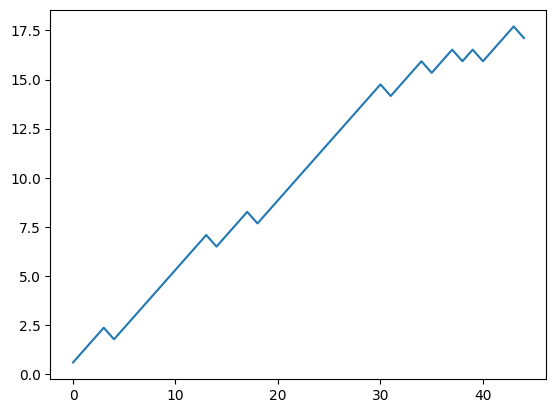

In [95]:
test_dates = []
bps = []
sps = []
pnl = []
profit = 0
for i in range(len(y_test) - 1):
    da = AAPL_Set[AAPL_Set.index == y_test.index[i]]['NDs'].values[0]
    news = AAPL_Set[AAPL_Set.index == y_test.index[i]]['title'].values[0]
    s = date.fromisoformat(da)
    delta = timedelta(days = 1)
    t = s + delta
    end = t.isoformat()
    p = yf.Ticker('AAPL').history(start = start, end = end)
    bias = y_pred[i]
    print(f'{news}: {bias}')
    if(bias == 'Buy'):
        profit += (p['Close'] - p['Open']).values[0]
        bps.append(p['Open'].values[0])
        pnl.append(profit)
    elif(bias == 'Sell'):
        profit -= (p['Close'] - p['Open']).values[0]
        sps.append(p['Open'].values[0])
        pnl.append(profit)
plt.plot(pnl)

<h1> NVDA?</h1>

In [ ]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import timedelta, date

from nltk.tokenize import sent_tokenize, word_tokenize
import nltk as nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings("ignore")

# %%
df = pd.read_csv('arp.csv')

tickers = df['stock'].unique()

# %%
tickers

# %%
tickers[tickers == 'AAPL']

# %%

tick = 'NVDA'
tick_Set = df[df['stock'] == tick] 

# %%
AAPL_Set

# %%
AAPL_Set['date'].iloc[0]

# %%
AAPL_Set['date'].iloc[0][0:10]

# %%
date_array = []
for i in range(len(AAPL_Set)):
    date_array.append(AAPL_Set['date'].iloc[i][0:10])
    
AAPL_Set['NDs'] = date_array

# %%
AAPL_Set

# %%
p = yf.Ticker('AAPL').history(start = '2020-03-10', end = '2020-03-11')
((p['Close'] - p['Open'])/p['Open']).values[0]

# %%
s = AAPL_Set['NDs'].values[i]
s = date.fromisoformat(s)
d = timedelta(days = 1)
t = s + d
t = t.isoformat()

# %%
d = timedelta(days = 1)
t = s + d
t

# %%
changes = []
for i in range(len(AAPL_Set)):
    try:
        start = AAPL_Set['NDs'].values[i]
        s = date.fromisoformat(start)
        delta = timedelta(days = 1)
        t = s + delta
        end = t.isoformat()
        p = yf.Ticker('AAPL').history(start = start, end = end)
        pct_change = ((p['Close'] - p['Open'])/p['Open']).values[0]
        if(pct_change >= 0):
            changes.append('Buy')
        else:
            changes.append('Sell')
    except Exception as e:
        changes.append('Hold')

# %%
AAPL_Set['Change'] = changes

# %%
AAPL_Set

# %%
useful_data = AAPL_Set[['title', 'Change']]

# %%
useful_data

# %%
words = AAPL_Set['title']
sentiment = AAPL_Set['Change']
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
)
features = vectorizer.fit_transform(words)
features_nd = features.toarray()
X_train, X_test, y_train, y_test  = train_test_split(
        features_nd, 
        sentiment,
        train_size=0.90, 
        random_state=1)

# %%
log_model = LogisticRegression(solver = 'liblinear', max_iter = 750,verbose = 1,warm_start = False)
log_model = log_model.fit(X_train,y_train)

# %%
y_pred = log_model.predict(X_test)
print("\n")
print(f'The accuracy of this model on the test set is: {round(100*accuracy_score(y_test, y_pred),2)}%')

# %%
dates = (AAPL_Set['NDs'].min(), AAPL_Set['NDs'].max())

# %%
dates

# %%
prices = yf.Ticker('AAPL').history(start = dates[0], end = dates[1], period = 'd')

# %%
prices

# %%
plt.plot(prices['Open'])

# %%
y_test.index.values

# %%
AAPL_Set[AAPL_Set.index == 3999]

# %%
test_dates = []
bps = []
sps = []
pnl = []
profit = 0
for i in range(len(y_test) - 1):
    da = AAPL_Set[AAPL_Set.index == y_test.index[i]]['NDs'].values[0]
    news = AAPL_Set[AAPL_Set.index == y_test.index[i]]['title'].values[0]
    s = date.fromisoformat(da)
    delta = timedelta(days = 1)
    t = s + delta
    end = t.isoformat()
    p = yf.Ticker('AAPL').history(start = start, end = end)
    bias = y_pred[i]
    print(f'{news}: {bias}')
    if(bias == 'Buy'):
        profit += (p['Close'] - p['Open']).values[0]
        bps.append(p['Open'].values[0])
        pnl.append(profit)
    elif(bias == 'Sell'):
        profit -= (p['Close'] - p['Open']).values[0]
        sps.append(p['Open'].values[0])
        pnl.append(profit)
plt.plot(pnl)